# Linear Regression in R

### What is linear regression ??

To run linear regression in R we use the function lm():
The first argument of lm() has the form "response ~ term". 
This is what we call formula. 

The first element of the formula is the response (dependent variable), and it should have numeric values (continuous variable). 
As we want to use this model to measure the relationship between G3 and other variables.

The second element, after the "~", is called term (independent variable) corresponding to the independent variable. 
It is a series of terms specifying a linear predictor for response. In this case, we use all other columns. 

What does the linear model do? 

It will try to find a line that best fits the data, according to:
Y=aX+b
Where Y is the response, X is the term, a is coefficient that defines the slope and b is the intercept with the Y axis.


In [182]:
df <- read.csv("Student-mat.csv", sep =';')

In [183]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [184]:
summary(df)

 school   sex          age       address famsize   Pstatus      Medu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281   A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114   T:354   1st Qu.:2.000  
                  Median :17.0                             Median :3.000  
                  Mean   :16.7                             Mean   :2.749  
                  3rd Qu.:18.0                             3rd Qu.:4.000  
                  Max.   :22.0                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max.   :4.00

In [185]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [186]:
# Check if we have any NAs on the df
any(is.na(df))

[1] FALSE

In [187]:
library(ggplot2)
library(ggthemes)
library(dplyr)
#library(corrgram)
library(corrplot)

In [188]:
# Lets see only the numeric columns
num.cols <- sapply(df, is.numeric)

In [189]:
num.cols

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE       TRUE      FALSE      FALSE      FALSE       TRUE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
      TRUE      FALSE      FALSE      FALSE      FALSE       TRUE       TRUE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
      TRUE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE       TRUE       TRUE       TRUE       TRUE       TRUE 
    health   absences         G1         G2         G3 
      TRUE       TRUE       TRUE       TRUE       TRUE

In [190]:
# Lets see the correlation between numeric columns
cor.data <- cor(df[, num.cols])

In [191]:
cor.data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


In [192]:
#install.packages('corrplot')

In [193]:
library(corrplot)

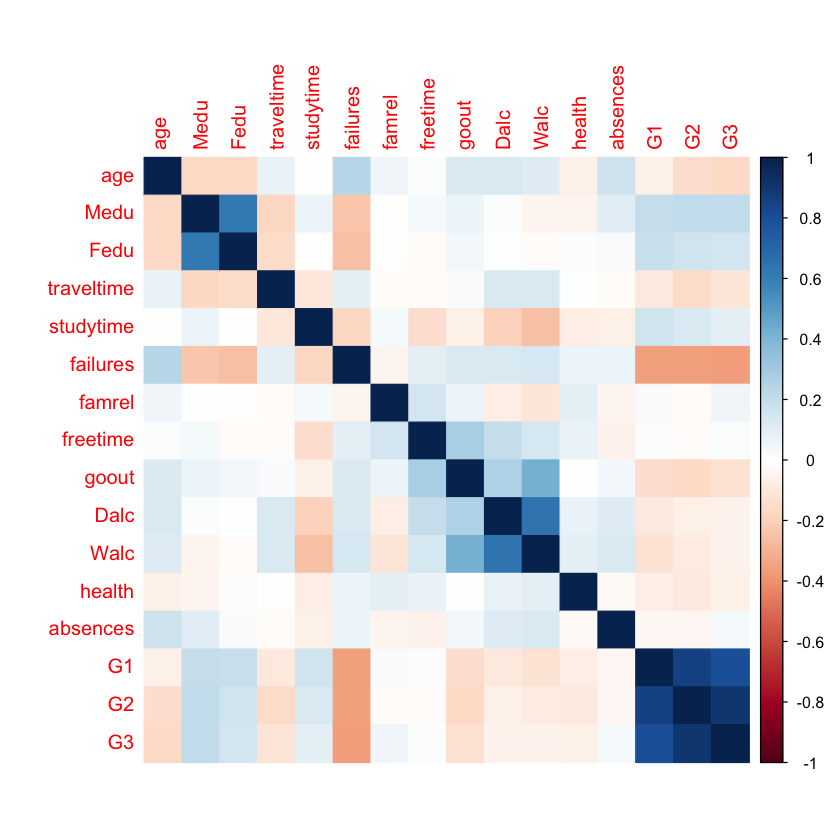

In [194]:
corrplot(cor.data, method = 'color')

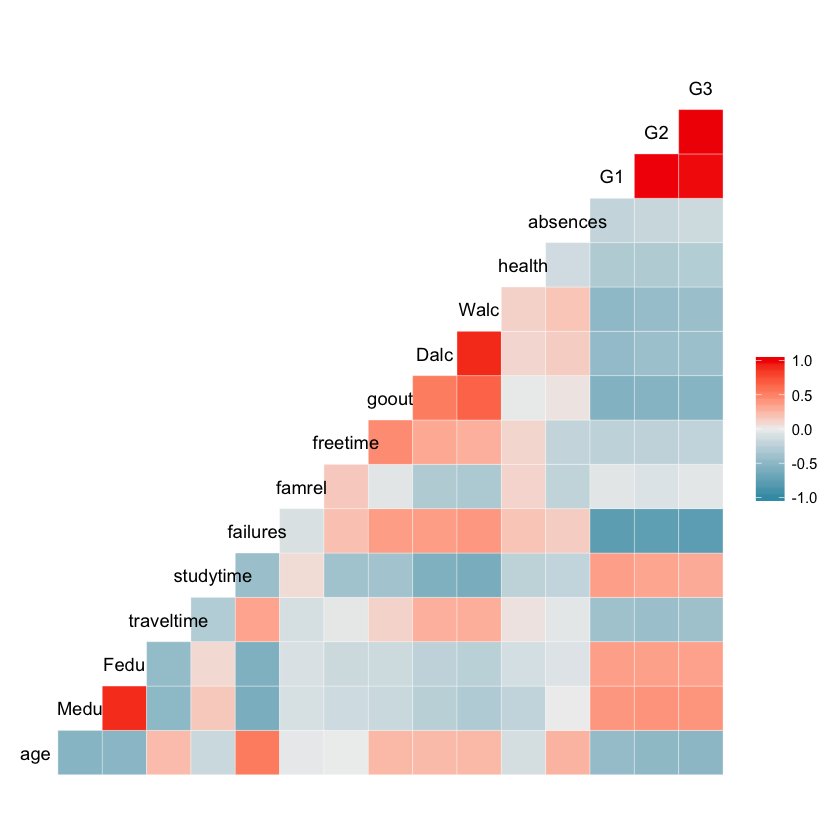

In [195]:
library(GGally)
ggcorr(cor.data)

## Train and Test split

In [196]:
library(caTools)

In [197]:
set.seed(101)
sample <- sample.split(df$G3, SplitRatio = 0.7) # G3 is the variable we want to predice
train <- subset(df, sample == TRUE) # 70% is training
test <- subset(df, sample == FALSE) # 30% is test set

In [198]:
model <- lm(G3 ~., data = train)

In [199]:
summary(model)


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4250 -0.6478  0.2844  1.0442  4.9840 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.70763    2.69488   1.376  0.17019    
schoolMS          0.66981    0.47436   1.412  0.15926    
sexM              0.25730    0.29257   0.879  0.38006    
age              -0.36163    0.12949  -2.793  0.00566 ** 
addressU          0.08123    0.35652   0.228  0.81996    
famsizeLE3        0.12222    0.28709   0.426  0.67070    
PstatusT          0.06807    0.43032   0.158  0.87444    
Medu              0.11100    0.18757   0.592  0.55455    
Fedu             -0.16373    0.15928  -1.028  0.30503    
Mjobhealth       -0.63993    0.65314  -0.980  0.32820    
Mjobother        -0.15730    0.42323  -0.372  0.71048    
Mjobservices     -0.15872    0.46682  -0.340  0.73415    
Mjobteacher      -0.04930    0.62335  -0.079  0.93702    
Fjobhealth        0.17565    0.83034 

### Interpreting the model: 

Take a closer look at "Residuals", in the output above. 
Residual is the difference between the actual data value and the value predicted by the linear model. 
It is calculated for every data sample - in our case, 277 obs(the training set) observarions. 
As it wouldn't be convenient to visualize 277 residuals, what you see above is a summary 
containing the Min, 1Q, Median, 3Q and Max values. 

Now look at the residual standard error: it's a measure of the model’s accuracy. 
In our model, the error is 1.962 on 235 degrees of freedom, which is a very good result. 
“Degrees of freedom” are defined as the difference between the number of observations 
in the sample and the number of variables in the model (277 obs. minus 33 variables). But this is not true in this model, 
I don't know how to explain this.

We also have the "Multiple R-squared”. This is a statistical measure of how closely the regression line fits the data.
Numerically, it’s the percentage of the response (dependent) variable’s variation that is explained by the independent variables.
Generally, good models have high values. However, a high R-squared value alone cannot justify the model. 

The last item in the output is the p-value, which tests the fit of the null hypothesis to our data. 
The null hypothesis assumes that there is no relationship between the independent and dependent variables in the model. 
The p-value represents the probability you will obtain a result equal to or more extreme than 
what was actually observed, if the null hypothesis is true. Generally, if the p-value is very low (below 0.05), 
it meets threshold to reject the null hypothesis. 

Here, the p-value is less than 0.05. We conclude that there is a significant relationship between G3 and Other variables.

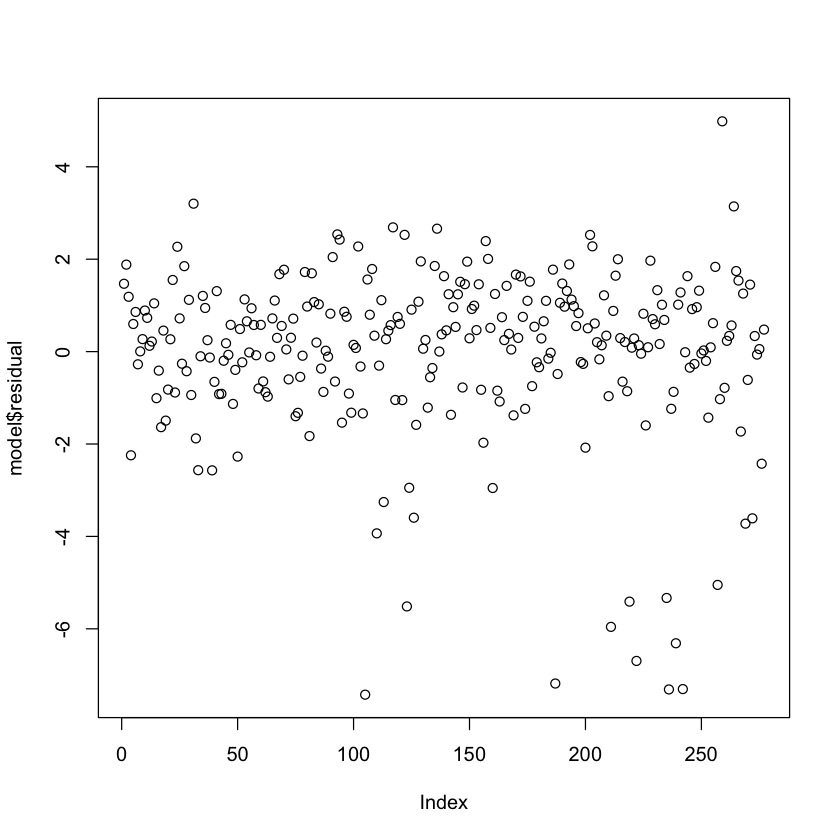

In [200]:
plot(model$residual)

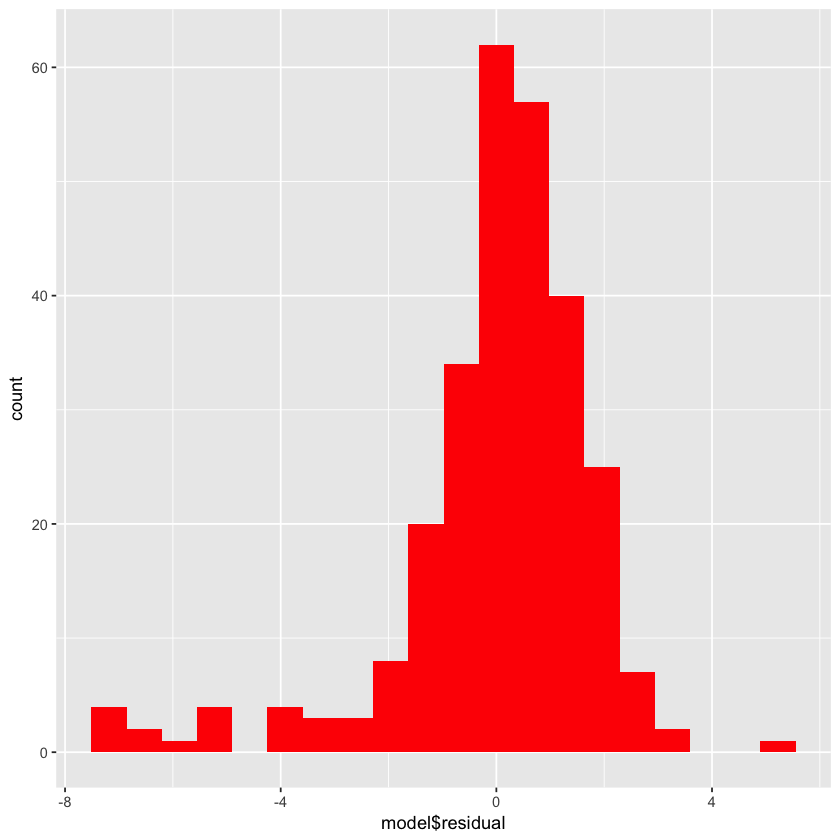

In [201]:
ggplot(aes(model$residual), data = model) + geom_histogram(bins = 20, fill = 'red')

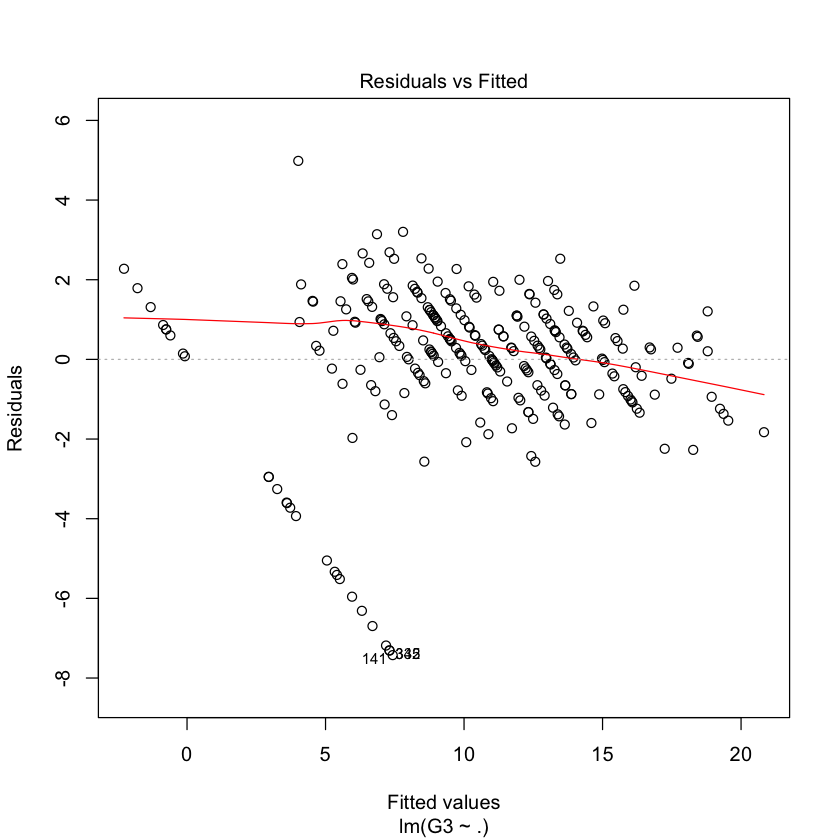

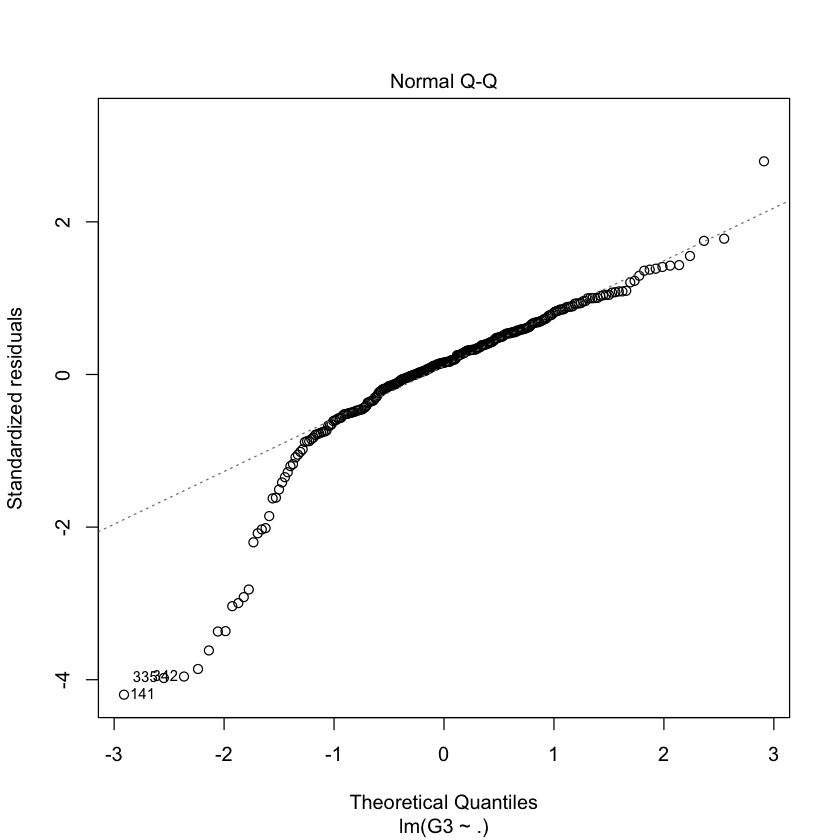

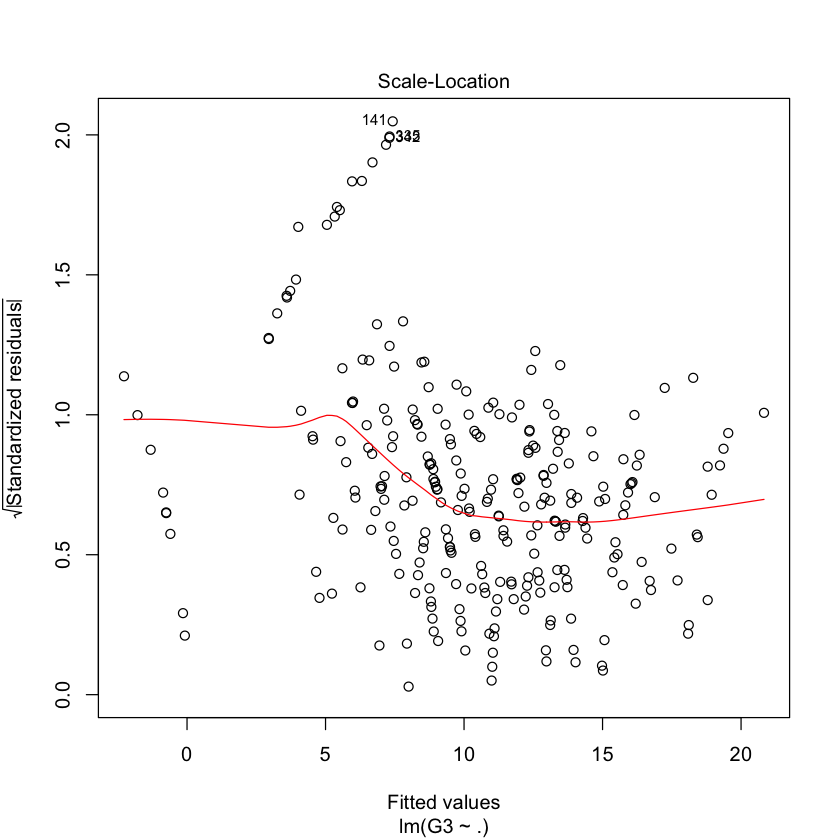

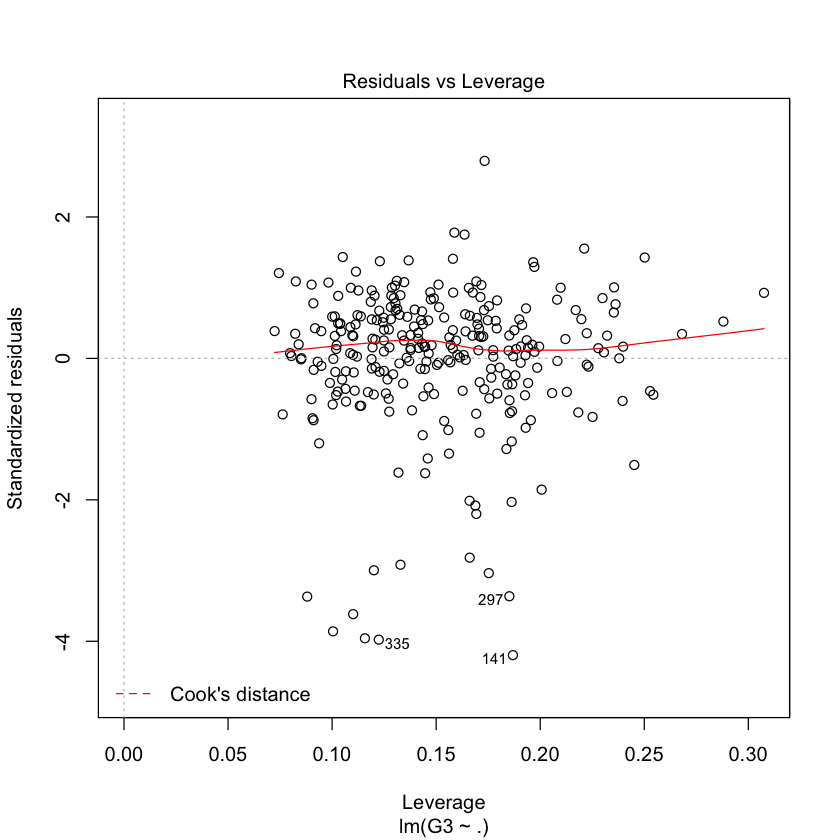

In [202]:
plot(model)

## Prediction

In [203]:
G3.predictions <- predict(model, test)

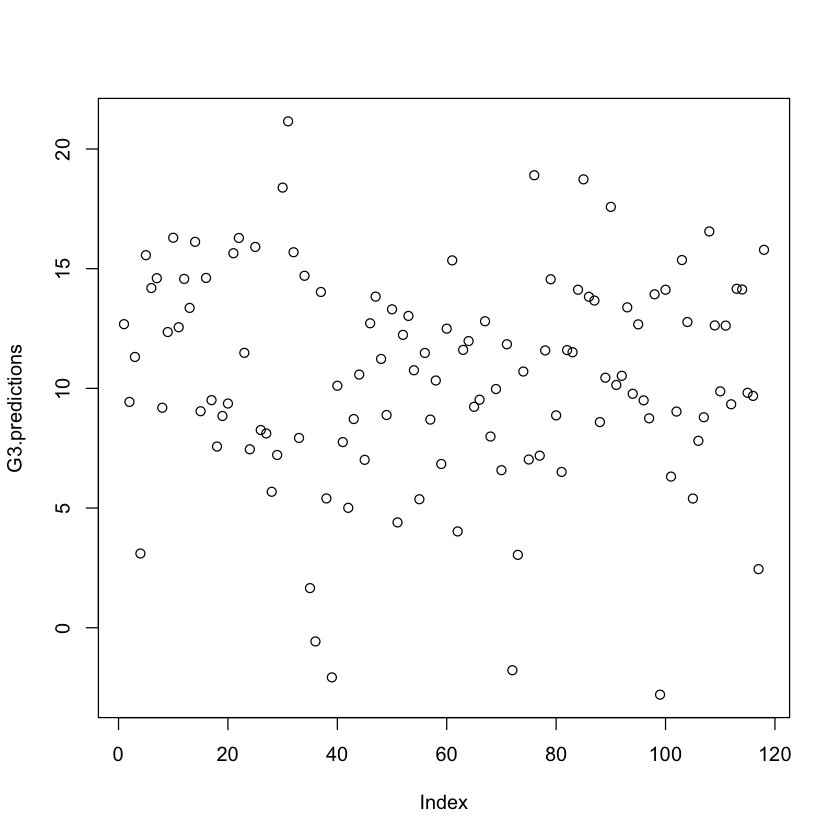

In [204]:
plot(G3.predictions) # This is the value of G3 predicted by our moel

### Comparing predicted and actual values

In [205]:
result <- cbind(G3.predictions, test$G3)

In [206]:
colnames(result) <- c('predicted', 'actual')

In [207]:
result <- as.data.frame(result)
print(head(result))

   predicted actual
4  12.682507     15
5   9.433677     10
7  11.312310     11
8   3.101530      6
10 15.564674     15
13 14.190360     14


In [208]:
min(result)

[1] -2.795582

#### It means our model predicted test data wrongly. It should not predict -ve value because our test data dose not have -ve value, the minimum is only zero. So our model should predict until zero not less than that.

### Taking care of negative prediction of our model

In [209]:
to_zero <- function(x){
    if (x <0){
        return(0)
    }else{
        return(x)
    }
}

In [210]:
# apply zero function
result$predicted <- sapply(result$predicted, to_zero)

### Lets evaluate prediction value using mean squared error

In [211]:
mse <- mean((result$actual - result$predicted)^2)
print(mse)

[1] 3.991675


In [212]:
# We can also use roor mean squared error
rmse <- sqrt(mean((result$actual - result$predicted)^2))

In [213]:
rmse

[1] 1.997918

### Calculate R-squared value

In [214]:
# SSE = (sum of squared errors) 
SSE <- sum((result$predicted - result$actual)^2)

In [215]:
#SST = (sum of squared total)
SST = sum((mean(df$G3) - result$actual)^2)

In [216]:
R2 <- 1 - SSE/SST

In [217]:
R2

[1] 0.8044477